In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
# import jax.numpy as jnp
# from jax import jacfwd, random

from scipy.stats import wishart
from scipy.special import psi, loggamma
import matplotlib.pyplot as plt
from scipy.linalg import cholesky

import numpy as np
from numba import njit, prange

In [2]:
def logdet(X):
    eigs = np.linalg.eigvalsh(X.T @ X)
    return np.sum(np.log(eigs))

def isogap(X):
    eigs = np.linalg.eigvalsh(X.T @ X)
    return np.mean(np.log(eigs)) - np.log(np.mean(eigs))


def rms_norm(X, axis=None):
    return np.mean(X**2,axis=axis)**0.5

def mom2com(p, moments):
    m1,m2,m3,m4 = moments[:4]
    if p==0:
        return 1
    elif p==1:
        return m1
    elif p==2:
        return m2 - m1**2
    elif p==3:
        return m3 - 3 * m1 * m2 + 2 * m1**3
    elif p==4:
        return m4 - 2 * m1 * m3 - 2 * m2 ** 2 - 2 * m1 * m3 + 10 * m1**2 * m2 - 5 * m1**4
def commulant(vals, p):
    vals = vals[np.isfinite(vals)]
    moments = [np.mean(vals**i) for i in range(1,5)]
    return mom2com(p, moments)


In [430]:

n, d = 10, 100
L = 100
r = 1

X = np.random.randn(d, r) @ np.random.randn(r, n)
X = X + 0.0001 * np.random.randn(d, n)
for i in range(d):
    X[i,:] *= np.random.poisson(10)
X /= rms_norm(X)

rn0 = rms_norm(X,axis=1)


for l in range(L):
    W = np.random.randn(d, d) / np.sqrt(d)
    X0 = X
    X = W @ X 
    rn = rms_norm(X,axis=1)
    BN = np.diag(rn**(-1))
    svd = np.linalg.svd(X, full_matrices=False)
    U = svd.U
    Y = BN @ U
    vals = [logdet(Y)/n]
    for _ in range(10):
        U = np.linalg.svd(np.random.randn(d,n),full_matrices=False).U
        Y2 = BN @ U
        vals.append(logdet(Y2)/n)
    print(vals)
    e = np.linalg.eigvalsh(Y.T @ Y) 
    approx = np.mean((e-1)/(e))
    # approx = -np.mean(np.log(rn**2))
    # print(-np.mean(rn**2-1),np.mean((rn**2-1)**2))
    # approx = np.mean((rn**2-1)**2) / 2
    approx = np.log(np.mean(1.0/rn**2)) - n/d
    tr = np.trace(X.T @ X / d)/n
    tr2 = np.trace((X.T @ X / d)@(X.T @ X / d))/n**2
    # approx = 2*tr2 
    delta = logdet(X0)/n - logdet(X)/n
    # print(delta, -n/2/d)
    # print(-isogap(Y), -isogap(X))
    print(f'X0 = {logdet(X0)/n:.3f}, X1 = {logdet(X)/n:.3f}, BN @ U : {np.mean(vals):.3f},  approx : {approx/2:.3f}, X2 = {logdet(BN @ X)/n:.3f}, ')
    X = BN @ X
    # eigs = np.linalg.eigvalsh(X.T @ X / d)
    # print(eigs)

    # plt.figure()
    # plt.title(f'l = {l}')
    # plt.hist(np.log(rn**(-2)),50,density=True,label='row norms',alpha=.5)
    # plt.hist(np.log(1+e), 50,density=True, label='BN eigs',alpha=.5)
    # plt.legend()

[2.630772801423717, 2.7094982793219033, 2.58315713281803, 2.6717771641546024, 2.7779801523431713, 2.7062257823138585, 2.6252899673687233, 2.725370158765782, 2.7744812021855845, 2.818203590060874, 2.7594492535212423]
X0 = -11.338, X1 = -11.352, BN @ U : 2.707,  approx : 1.875, X2 = -8.721, 
[2.481274314726355, 2.7488809666182576, 2.8779353004449275, 2.6474802129416526, 2.619264027567003, 2.770467776805886, 2.7312326154395614, 2.5446973024237383, 2.6737891915250978, 2.6667943357982593, 2.7614595191517237]
X0 = -8.721, X1 = -8.733, BN @ U : 2.684,  approx : 1.711, X2 = -6.251, 
[2.378611877538776, 2.646357894870642, 2.7941464110886716, 2.7378726887209046, 2.790669675121543, 2.5573089224829166, 2.837519552566009, 2.7333622707504768, 2.8155426817993185, 2.625689015500209, 2.8352843306813043]
X0 = -6.251, X1 = -6.356, BN @ U : 2.705,  approx : 1.571, X2 = -3.977, 
[2.2846379255641023, 2.5876503414427554, 2.630299372210952, 2.531955443836352, 2.580836464904988, 2.6614829573678005, 2.588272030

In [424]:
vals

[0.10453476632176022,
 0.3730206599131268,
 0.34950839125300975,
 0.3055393355826852,
 0.34240129271576,
 0.3403901632899643,
 0.33271307924551136,
 0.3745867911780832,
 0.3105602233640659,
 0.2921056887606411,
 0.33746123676576073]

In [297]:
n, d = 2, 1000
r = 1

X = np.random.randn(d, r) @ np.random.randn(r, n)
X = X + 0.01 * np.random.randn(d, n)
X /= rms_norm(X)

W = np.random.randn(d, d) /np.sqrt(d)

Y = W @ X

rn = np.mean(Y**2,axis=1)**0.5

e = np.linalg.eigvalsh(X.T @ X/d)

tr = np.sum(e)/n
tr2 = np.sum(e**2)/n**2


theory = 2*tr2 + tr**2 - 2 * tr + 1

np.mean((rn**4 - 2*rn**2 + 1)), theory

(2.004294621633315, 1.9999545379077555)

In [246]:
n, d = 2, 100

X = np.random.rand(n, d)
w = np.random.randn(d,1)

Y = X @ w

np.sum(Y**2)

2.9669129347583225

/var/folders/lm/3y29pbg17l30756m1x_vpb040000gp/T/ipykernel_7792/1484690058.py:36: RuntimeWarning: invalid value encountered in log
  plt.hist(np.log(C_eigs),50,alpha=.3,density=True)


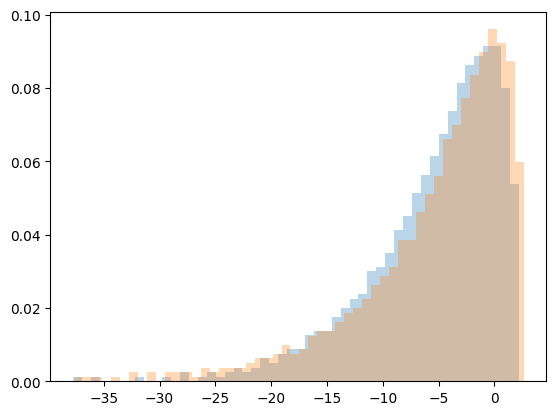

8.217500743240816e-16
0.0036350143811328286
-0.009278898319624763
0.009383989132378362


In [80]:
n, d = 1000, 1000
p, q = 2, 2
X = np.random.randn(n, d) #/ np.sqrt(d)
svd = np.linalg.svd(X,full_matrices=False)
S = svd.S**p 
S = S / rms_norm(S) 
X = svd.U @ np.diag(S) @ svd.Vh
A = X @ X.T
Y = np.random.randn(n, d) #/ np.sqrt(d)
svd = np.linalg.svd(Y,full_matrices=False)
S = svd.S**q
S = S / rms_norm(S)
Y = svd.U @ np.diag(S) @ svd.Vh
B = Y @ Y.T

XY = X @ Y

C = XY @ XY.T


C_eigs = np.linalg.eigvalsh(C)

e1, V = np.linalg.eigh(A)
# plt.hist(np.log(e1),50,alpha=.5,density=True)
A_log = V @ np.diag(np.log(e1)) @ V.T

e2, V = np.linalg.eigh(B)
# plt.hist(np.log(e2),50,alpha=.5,density=True)
B_log = V @ np.diag(np.log(e2)) @ V.T

C_log = A_log + B_log

C_eigs_log = np.linalg.eigvalsh(C_log)
plt.figure()
plt.hist(C_eigs_log,50,alpha=.3,density=True)
plt.hist(np.log(C_eigs),50,alpha=.3,density=True)
plt.show()

a = np.log(e1)
b = np.log(e2)
c = C_eigs_log

for p in [1,2,3,4]:
    A , B, C = (commulant(a,p), commulant(b,p), commulant(c, p))
    print((A + B -  C)/abs(C))

Moments to commulants:

\begin{align*}
\kappa_1 &= \mu_1\\
\kappa_2 &= \mu_2 - \mu_1^2\\
\kappa_3 &= \mu_3 - 3 \mu_1 \mu_2 + 2 \mu_1^3\\
\kappa_4 &= \mu_4 - 2 \mu_1 \mu_3 - 2\mu_2^2 - 2 \mu_1 \mu_3 + 10 \mu_1^2 \mu_2  - 5 \mu_1^4 
\end{align*}

In [ ]:
n, d = 100,1000
X = np.random.randn(d, 1) @ np.random.randn(1, n)
X = X + 0.001 * np.random.randn(d, n)
X /= rms_norm(X)

W = np.random.randn(d, d) / np.sqrt(d)
X = W @ X 
rn = rms_norm(X,axis=1)
BN = np.diag(1.0/rn)
svd = np.linalg.svd(X, full_matrices=False)
U = svd.U
Y = BN @ U
e = np.linalg.eigvalsh(Y.T @ Y) 


x = np.log(1/rn**2)
y = np.log(e)

p = 4
commulant(x,p), commulant(y,p)

# plt.hist(x,30,density=True,alpha=.5)
# plt.hist(y,30,density=True,alpha=.5)


In [316]:
n, d = 10, 1000
p, q = 1, 0.5
df = 3

for r in [0.8]:
    X = np.random.randn(n, d) 
    svd = np.linalg.svd(X,full_matrices=False)
    S = svd.S**p 
    # S = np.random.chisquare(df=df, size=n) / df
    S = S / rms_norm(S) 
    X = svd.U @ np.diag(S) @ svd.Vh
    A = X @ X.T

    Y = np.random.randn(n, d) 
    svd = np.linalg.svd(Y,full_matrices=False)
    S = svd.S**q
    S[:] = 1
    S[np.random.rand(len(S))<r] = 1e-20
    S = S / rms_norm(S)
    Y = svd.U @ np.diag(S) @ svd.Vh
    B = Y @ Y.T

    XY = X @ Y
    C = XY @ XY.T 
    A_eigs = np.log(np.linalg.eigvalsh(A))
    B_eigs = np.log(np.linalg.eigvalsh(B))
    C_eigs = np.log(np.linalg.eigvalsh(C))
    eps = np.log(1e-10)
    all = np.concatenate([A_eigs, B_eigs, C_eigs])
    all = all[all>eps]
    all = all[np.isfinite(all)]
    bins = np.linspace(min(all), max(all), 100)
    plt.figure()
    plt.hist(A_eigs[A_eigs>eps],bins,density=True,alpha=.5)
    # plt.hist(B_eigs[B_eigs>eps],bins,density=True,alpha=.5)
    plt.hist(C_eigs[C_eigs>eps],bins,density=True,alpha=.5)


# for p in [1,2,3,4]:
#     A , B, C = (commulant(A_eigs,p), commulant(B_eigs,p), commulant(AB_eigs, p))
#     print(A+B, C)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 1000)

/var/folders/lm/3y29pbg17l30756m1x_vpb040000gp/T/ipykernel_55130/3156504232.py:27: RuntimeWarning: invalid value encountered in log
  B_eigs = np.log(np.linalg.eigvalsh(B))
/var/folders/lm/3y29pbg17l30756m1x_vpb040000gp/T/ipykernel_55130/3156504232.py:28: RuntimeWarning: invalid value encountered in log
  C_eigs = np.log(np.linalg.eigvalsh(C))


-0.02008, 2.25241, 2.27249


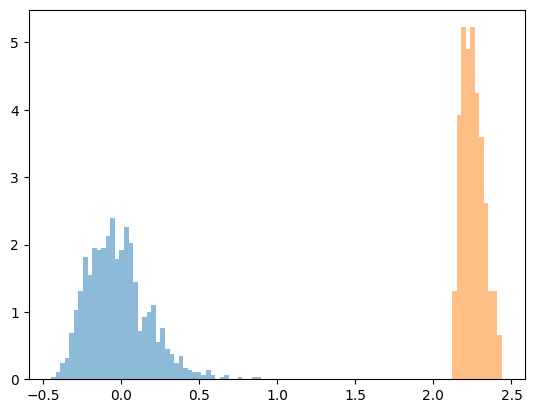

-27.764243347819985 -27.942981247564784
212.77938421737556 214.64003335507505
4821.539527807304 4901.216378110737
65962.1212585284 67915.36276234733


In [360]:
n, d = 1000, 1000
p, q = -0.1, 0.5
df = 3

for r in [0.9]:
    X = np.random.randn(n, d) 
    svd = np.linalg.svd(X,full_matrices=False)
    S = svd.S
    S = np.random.chisquare(df=df, size=n) / df
    S = S**p
    S = S / rms_norm(S) 
    X = svd.U @ np.diag(S) @ svd.Vh
    A = X @ X.T

    Y = np.random.randn(n, d) 
    svd = np.linalg.svd(Y,full_matrices=False)
    S = svd.S**q
    S[:] = 1
    S[np.random.rand(len(S))<r] = 0
    S = S / rms_norm(S)
    Y = svd.U @ np.diag(S) @ svd.Vh
    B = Y @ Y.T

    XY = X @ Y
    C = XY @ XY.T 
    A_eigs = np.log(np.linalg.eigvalsh(A))
    B_eigs = np.log(np.linalg.eigvalsh(B))
    C_eigs = np.log(np.linalg.eigvalsh(C))
    eps = np.log(1e-10)
    all = np.concatenate([A_eigs, B_eigs, C_eigs])
    all = all[all>eps]
    all = all[np.isfinite(all)]
    bins = np.linspace(min(all), max(all), 100)
    # bins = 50
    plt.figure()
    plt.hist(A_eigs[A_eigs>eps],bins,density=True,alpha=.5)
    # plt.hist(B_eigs[B_eigs>eps],bins,density=True,alpha=.5)
    plt.hist(C_eigs[C_eigs>eps],bins,density=True,alpha=.5)
    x, y = A_eigs[A_eigs>eps], C_eigs[C_eigs>eps]
    print(f"{np.mean(x):.5f}, {np.mean(y):.5f}, {(np.mean(y)-np.mean(x)):.5f}")

plt.show()
for p in [1,2,3,4]:
    A , B, C = (commulant(A_eigs,p), commulant(B_eigs,p), commulant(C_eigs, p))
    print(A+B, C)

In general R-transform has an expansion based on the commulants: 
$$
R(z) = \sum_{i=0}^\infty \kappa_{i+1}z^i
$$
for MP, we have 
$$
R(z) = \frac{\sigma^2 }{1-\sigma^2\lambda z} = \sigma^2 (\sum_{i=0}^\infty \sigma^{2i} z^i)
$$
Thus we can conclude for MP: $\kappa_i = \sigma^{2(i+1)}$

In [66]:
e = C_eigs
e = e[np.isfinite(e)]
# e = np.exp(e)
commulant(e, 1), commulant(e, 2)**0.5, abs(commulant(e, 3))**0.33,abs(commulant(e, 4))**0.25
# np.mean(e), np.mean(e**2)

(-23.690345077883794,
 16.94945235460679,
 15.398295436296246,
 12.721463865820784)

Suppose $U$ is a random rotation matrix in $R^d$. Our goal is to analyze expectation of matrices of the form $E tr(U^\top A U)$ or $E tr((U^\top A U)^2),$ for some diagonal matrix $A$ with diagonals $A_{ii} = a_i.$ Let us expand the two terms:
\begin{align*}
E tr(U^\top A U) = \sum_{i} (U^\top A U)_{ii} \\
= E \sum_{i, j} u_{ji} u_{j i} a_j \\
= \sum_{i, j} a_j E u_{ij}^2  
\end{align*} 
Note that $E \sum_{j=1}^d U_{ij}^2 = 1,$ because the term inside is the norm of the $i$-th row, and due to symmetry wrt $j,$ we have

\begin{align}
E U_{ij}^2 = 1/d  
\end{align}

Thus we have 
\begin{align}
E tr(U^\top A U) = \sum_{i, j} a_j/d = \sum_{i} tr(A) / d
\end{align}

And for the forth order term :
\begin{align*}
E tr((U^\top A U)^2)= \sum_{i} (U^\top A U U^\top A U)_{ii} \\
= E\sum_{i,j,k,l} (U^\top)_{ij} A_{jj} U_{jk} (U^\top)_{kl} A_{ll} U_{li}\\
= E \sum_{i,j,k,l} a_j a_l U_{j i} U_{j k} U_{lk} U_{li}
\end{align*} 
Now, similar to before, if $j\neq l$ and $i\neq k,$ the four variables corresponding to $U$ will be independent, and flipping the sign of one won't change the distribution, implying that it will vanish. Now, let us suppose $i = k$: 
\begin{align*}
\sum_{j=1}^d  E U_{ji}^2 U_{li}^2 = E (\sum_{j=1}^d U_{ji}^2) U_{li}^2 = E U_{li}^2 = 1/d \\
= (d-1) \sum_{j\neq l} U_{ji}^2 U_{li}^2  + E U_{ij}^4
\end{align*}
Now, we can directly calculate the fourth order term $E U_{ij}^4 = 3/d(d+2),$ and plug in the value to get:
\begin{align*}
E U_{ji}^4 = \frac{3}{d(d+2)}\\
j \neq l \implies E U_{ji}^2 U_{li}^2 = \frac{1}{d-1}\left(\frac1d - \frac{3}{d(d+2)}\right) \\
= \frac{d+2 - 3}{d(d+2)(d-1)} = \frac{1}{d(d+2)}
\end{align*}
Finally, note that the cae where $j=l$ but $i\neq k$ is exactly symmetric, and thus we still have $ \frac{1}{d(d+2)}.$

Thus, we arrive at the conclusion: 
\begin{align}
E U_{j i} U_{j k} U_{lk} U_{li} = \frac{\delta_{jl}+\delta_{ik} + \delta_{jl}\delta_{ik}}{d(d+2)}
\end{align}
And for the main summation we have 
\begin{align}
E tr((U^\top A U)^2) = \sum_{i,j,l,k} a_j a_l \frac{\delta_{jl}+\delta_{ik} + \delta_{jl}\delta_{ik}}{d(d+2)}
\end{align}

Thus, the term $a_j a_l$ will have $\sum_{ik} \delta_{ik} / d(d+2)$ coefficients, where $i,k$ iterate over column indices, and must be equal.  If we have $n$ columns, this is $n / d(d+2)$. Otherwise, we have $a_j^2/d(d+2) \sum_{i,k}^n 1 + 2 \delta_{ik} = a_j^2(n^2 + 2n)/d(d+2)$ where again, $i,k$ iterate over columns. Thus, the expectation overall will be 
\begin{align*}
E tr((U^\top A U)^2) = \sum_{j\neq l} a_j a_l \frac{n}{d(d+2)} + \sum_{j} a_j^2 \frac{n^2 + 2n}{d(d+2)}\\
= (\sum_j a_j)^2\frac{n}{d(d+2)} + (\sum_j a_j^2) \frac{n(n+1)}{d(d+2)}\\
= tr(A)^2\frac{n}{d(d+2)} + tr(A^2)\frac{n(n+1)}{d(d+2)}
\end{align*}
Putting the main two results together:
\begin{align}
E tr(U^\top A U) &= tr(A) \frac{n}{d}\\
E tr((U^\top A U)^2) &= tr(A)^2\frac{n}{d(d+2)} + tr(A^2)\frac{n(n+1)}{d(d+2)}
\end{align}

In [197]:
# Testing the equations for orthognal indices of fourth order
    
delta = lambda i,j: 1 if i==j else 0
n, d = 3, 20
r1,r2 = 0, 1
c1,c2 = 0, 1
vals = []
for _ in range(10000):
    X = np.random.randn(d, n)
    U = np.linalg.svd(X, full_matrices=False).U
    a = U[r1,c1]* U[r1,c2] * U[r2,c1] * U[r2,c2]
    vals.append(a)

theory = (delta(r1,r2)+delta(c1,c2)+delta(r1,r2)*delta(c1,c2)) / d / (d+2)
# print(f"{np.mean(vals):.5f}, {theory:.5f}")
np.mean(vals), theory

(-0.00013394194390676115, 0.0)

432436.7701862818


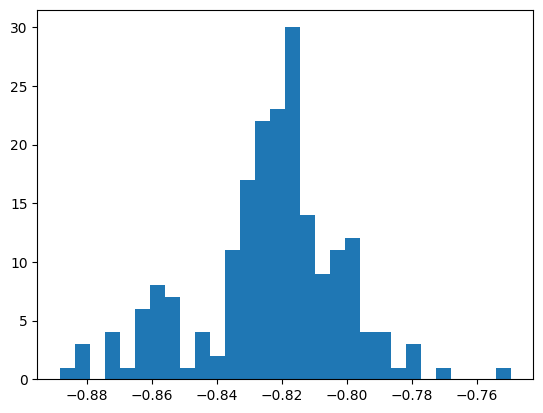

In [411]:
# Testing the equations for expected trace 
    
delta = lambda i,j: 1 if i==j else 0
n, d = 200, 1000
df = 1
a = np.random.chisquare(df=df, size=d) / df
A = np.diag(a**(-1))

X = np.random.randn(d, n)
U = np.linalg.svd(X, full_matrices=False).U

B = U.T @ A @ U 

eig_A = np.linalg.eigvalsh(A)
eig_B = np.linalg.eigvalsh(B)

print(eig_A[-1]/eig_A[-n])
plt.hist((eig_B-eig_A[-n:])/eig_A[-n:],30)


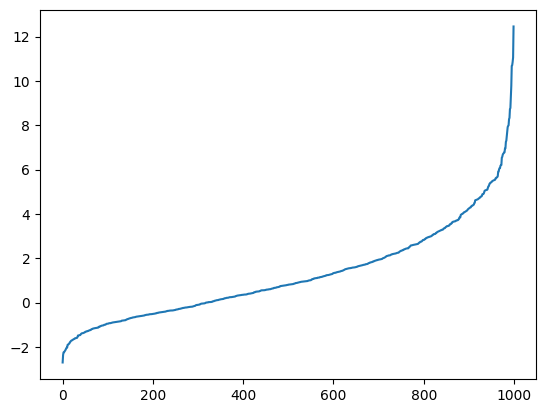

In [407]:
plt.plot(np.log(eig_A))


In [163]:
n, d = 5, 10000
X = np.random.randn(d, n) 
svd = np.linalg.svd(X, full_matrices=False)
S = np.random.chisquare(df=1,size=n)**(-0.5)
# S = S / np.mean(S**2)**0.5 
# x = 0.1
# S = [x]*n
# S[-1] = n - (n-1) * x
# S = [(n-x)/(n-1)] * n
# S[0] = x
# S = np.array(S)**0.5
X = svd.U @ np.diag(S) 
X = X/ np.mean(X**2)**0.5
CX = X.T @ X / d
W = np.random.randn(d, d) / np.sqrt(d)
Y = W @ X 
Y /= np.mean(Y**2)**0.5
CY = Y.T @ Y / d
rn = np.mean(Y**2,axis=1)
BN = np.diag(rn**(-1))
Z = BN @ Y
Z = Z/ np.mean(Z**2)**0.5
CZ = Z.T @ Z / d
ex = (np.linalg.eigvalsh(CX))
ez = (np.linalg.eigvalsh(CZ))

np.log(ex), np.log(ez), np.all(abs(np.log(ez)) < abs(np.log(ex)*0.66))

(array([-3.04423505, -2.39043973, -2.37205845, -0.08687614,  1.34825462]),
 array([-0.88790858, -0.53226401, -0.46619955,  0.33508569,  0.68095737]),
 False)

In [164]:
np.log(ex), np.log(ex)*0.9, np.log(ez), np.all(abs(np.log(ez)) < abs(np.log(ex)*0.99))

(array([-3.04423505, -2.39043973, -2.37205845, -0.08687614,  1.34825462]),
 array([-2.73981155, -2.15139576, -2.13485261, -0.07818852,  1.21342916]),
 array([-0.88790858, -0.53226401, -0.46619955,  0.33508569,  0.68095737]),
 False)

For every $\lambda_i < 1$, we have $\log(\sigma_i)-\log(\lambda_i) \ge ( 1- \lambda_i)/k$


and for every $k\ge \lambda_i > 1$ we have $\log(\sigma_i) - \log(\lambda_i) \le  -\log(\lambda_i)/k,$ 


and if $\lambda_1 \ge k$ the others $\lambda_i$ will go below $1/k,$ which ensures that they log det will reduce by around $(k-1)/k \approx 1$ 

If more than half of $\lambda_i$'s are less than $1/2$, then the $\log(\sigma_i)-\log(\lambda_i) $ term corresponding to them will be at least $k/4$. Now, if $\log\det(\Lambda) < k/2. $ 

So, we can say that $\log\det(\Sigma) - \log(\Lambda) \ge \min(1,-\log\det(\Lambda))/n - n/2d$, which implies that $-\log\det(\Lambda)/n$ will stabilise around $-n/2d$. Note that $-\log\det(\Lambda)/n \approx \frac1n \sum_{i=1}^n (\lambda_i-1)^2 \to n/2d$

note that sum of $\lambda_i$: there are are k terms below one with sum $S$, and $n-k$ terms above one with sum $n-S$. 
Thus, the maximum value of the determinant will be when they are both equal: $k$ terms equal to $S/k < 1$, and $n-k$ terms all equal to $(n-S)/(n-k) > 1.$ the log-determinant is $(1-k/n)\log( (n-S)/(n-k)) - k/n\log( S/k)$


if $-\log\det(\Lambda) > 1/2$ then $\sum_i -\log\lambda_i 


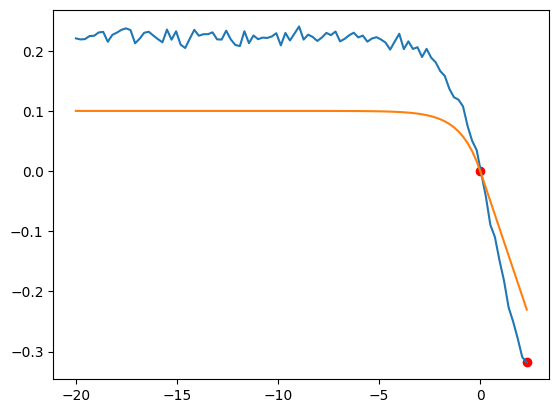

In [423]:
k = 10
ms = np.exp(np.linspace(-20,np.log(k),100))
E = np.zeros_like(ms)
for i,m in enumerate(ms):
    N = 50000
    X = m*np.random.chisquare(df=1,size=N)
    Y = np.random.chisquare(df=k, size=N)
    E[i] = np.log(np.mean((m+k)*X/(X+Y)/m))
plt.plot([0],[0],'r',marker='o')
im = np.argmin(E)
x = np.log(ms)
plt.plot([x[im]],[E[im]],'r',marker='o')
y = (x<0) *1/k * (1- np.exp(x)) + (x>0) * (-x * 1 /k )
plt.plot(x,E)
plt.plot(x, y)

33.115451958703375

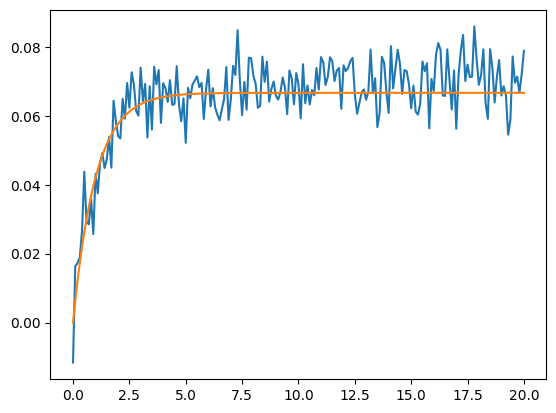

In [322]:
x = -np.log(ms)
y = 2/k * (1- np.exp(-x))
plt.plot(x,E)
plt.plot(x, y)


In [194]:
k = 3
N = 10000
X = np.random.randn(N,k)
BN = np.mean(X**2,axis=1)**0.5
Y = X / BN[:,np.newaxis]

CX = X.T @ X / N
CY = Y.T @ Y / N

# np.diag(C)
np.log(np.linalg.det(CX)),np.log(np.linalg.det(CY))


(0.006832011710034293, -0.0005973476849343913)

In [53]:
n, d = 2, 100
L = 100

X = np.random.randn(d,1) @ np.random.randn(1, n)
X += 0.1*np.random.randn(d, n)
X = X / np.mean(X**2)**0.5
H = []
for l in range(L):
    W = np.random.randn(d, d) / np.sqrt(d)
    X = W @ X
    rn = np.mean(X**2,axis=1)**0.5
    BN = np.diag(rn**(-1))
    X = BN @ X
    H.append(X)

In [17]:
C0

array([[ 9.87074513e+04, -4.60519603e-01, -3.30618668e+00,
         1.59039046e+01, -1.03675159e+01,  3.56530515e+00,
        -1.27658517e+00,  7.70826420e+00, -1.78321935e+01,
        -1.78875982e+01],
       [-4.60519603e-01,  9.81073795e+00,  3.80733459e-03,
        -1.82397712e-01, -4.81152991e-02, -4.25221251e-02,
         4.28645422e-02, -4.51209173e-02, -7.23059506e-02,
         3.67886066e-02],
       [-3.30618668e+00,  3.80733459e-03,  9.52935708e+00,
         3.21849105e-02, -4.72146215e-02,  2.52116889e-02,
         9.35589866e-02, -1.66231329e-01, -7.97868812e-02,
         2.28665999e-02],
       [ 1.59039046e+01, -1.82397712e-01,  3.21849105e-02,
         9.64393113e+00, -1.18596253e-01,  3.72930231e-02,
        -5.56359391e-02, -5.96535498e-03, -2.78363520e-02,
        -7.82037453e-02],
       [-1.03675159e+01, -4.81152991e-02, -4.72146215e-02,
        -1.18596253e-01,  9.68657645e+00,  5.07901476e-02,
         5.16696533e-02, -2.27876658e-02,  3.69505792e-02,
        -2.

In [75]:
n, d = 20, 10000


# X = np.random.randn(d, 1) @ np.random.randn(1, n)
X = np.random.randn(d, n)
svd = np.linalg.svd(X,full_matrices=False)
S = svd.S
# S = np.ones(n)
# S = S ** (3)
S[0] *= 20
X = svd.U @ np.diag(S) 
S = S / np.mean(S**2)**0.5
X /= np.mean(X**2)**0.5
CX = X.T @ X / d


W = np.random.randn(d, d) / np.sqrt(d)
H = W @ X
C0 = H.T @ H / d

rn = np.mean(H**2,axis=1)**0.5
BN = np.diag(1.0/rn)

Y = BN @ H 

C0 = Y.T @ Y / d

d = 100

X = np.random.rand(d, n)
svd = np.linalg.svd(X,full_matrices=False)
X = svd.U @ np.diag(S) 

Cs = []
for _ in range(100):
    W = np.random.randn(d, d) / np.sqrt(d)
    H = W @ X
    C2 = H.T @ H 

    rn = np.mean(H**2,axis=1)**0.5
    BN = np.diag(1.0/rn)

    Y = BN @ H
    C2 = Y.T @ Y / d
    Cs.append(C2)


In [76]:
C0, np.mean(np.stack(Cs),axis=0)

(array([[ 1.55546267e+01, -1.98338288e-02, -1.47182847e-02,
         -1.32406655e-02,  6.60897981e-03,  2.60241592e-02,
         -3.65758084e-03,  6.61705036e-03, -2.74826632e-03,
         -2.04963649e-02,  1.54683712e-03, -2.81116025e-02,
         -2.00442231e-02,  1.78118082e-02,  9.08709699e-03,
          3.00970072e-02,  5.12613371e-03, -2.23795230e-02,
          2.67342177e-02, -7.02814726e-03],
        [-1.98338288e-02,  2.41975620e-01,  7.32066579e-03,
         -1.52570218e-03,  2.55959912e-03, -1.06151257e-03,
          4.40011849e-03,  2.03756288e-03, -1.28361046e-03,
         -3.19978409e-03, -2.01444602e-03,  3.28707593e-03,
         -4.20103737e-03, -1.09915509e-03, -2.46416568e-03,
         -1.94751837e-03,  2.79873689e-03,  1.48738095e-03,
          1.43670201e-03,  1.26185739e-03],
        [-1.47182847e-02,  7.32066579e-03,  2.52217507e-01,
         -1.13598430e-03,  1.99389927e-03,  6.99127301e-03,
          8.81602136e-04,  1.30617177e-03,  2.56797157e-03,
          4.

In [77]:
logdet = lambda x: np.min(np.log(np.linalg.eigvalsh(x)))

eig = np.linalg.eigh(C0)
Q = eig.eigenvectors @ np.diag(eig.eigenvalues**(-1/2)) @ eig.eigenvectors.T
l0 = logdet(C0)
print(logdet(CX), logdet(C0), np.mean([logdet(C)-logdet(CX) for C in Cs]))
# print(, np.log(1-np.sqrt(n/d)))
# print(logdet(C0))

# plt.hist([logdet(C)/l for C in Cs], 30)

-3.190877226794084 -1.5922363040718948 0.035099416395791526


In [81]:
d = 2000
n = 400
W = np.random.randn(d, n)
logdet(W.T @ W / d) / n, -n/d

(-0.2193304235753243, -0.2)

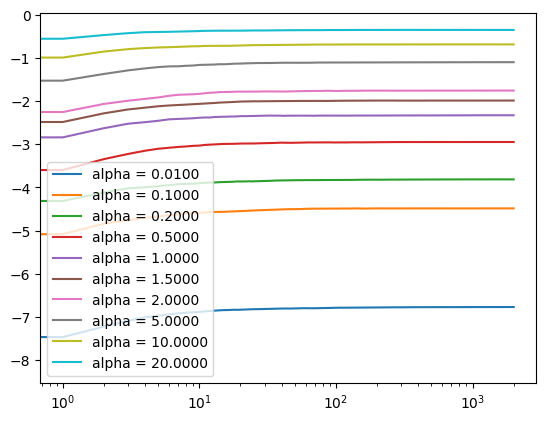

In [390]:
n = 20
d = 2000
N = 1000
alphas = np.array([0.01,0.1,0.2, 0.5, 1, 1.5, 2,5,10, 20,])
rs = alphas / (alphas + n-1) * n  
# dfs = []
Y = np.zeros((d, len(alphas)))
for i,alpha in enumerate(alphas):
    
    X = np.random.randn(d*N, n)
    X1 = alpha * X[:,0]**2  
    X2 = alpha* X[:,0]**2 + np.sum(X[:,1:]**2,axis=1)
    ratio = X1/X2
    ys = []
    for j in range(N):
        y = np.log(np.cumsum(ratio[j::N]) / np.arange(1,d+1)/r)
        # y = np.log(np.mean(X1/X2)  / r)
        ys.append(y)
    ys = np.stack(ys)
    ys = np.mean(ys,axis=0)
    Y[:,i] = ys
    # df = np.nonzero((1-alpha)*ys>0.0)[0][0]
    # dfs.append(df)
    # print(f"first d  = {df}")

    plt.plot(ys, label=f"alpha = {alpha:.4f}")
# dfs = np.array(dfs)
plt.legend()
plt.xscale('log')
# np.mean(ys)

/var/folders/lm/3y29pbg17l30756m1x_vpb040000gp/T/ipykernel_72011/792140361.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(dfs, n/dfs**(1)/2)


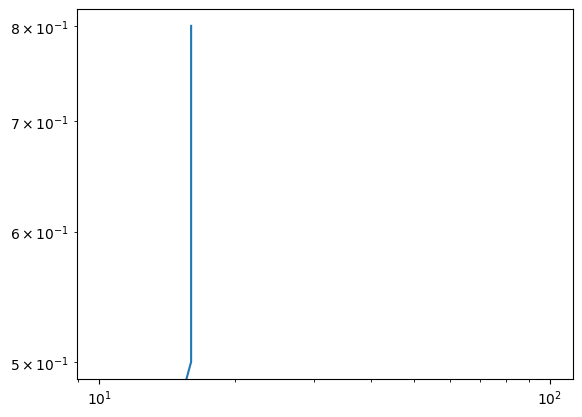

In [312]:
plt.plot(dfs, 1-alphas)
plt.plot(dfs, n/dfs**(1)/2)
plt.xscale('log')
plt.yscale('log')

/var/folders/lm/3y29pbg17l30756m1x_vpb040000gp/T/ipykernel_72011/811429115.py:1: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(1-rs,Y[-1,:]**0.5,marker='.')


IndexError: index 8 is out of bounds for axis 1 with size 8

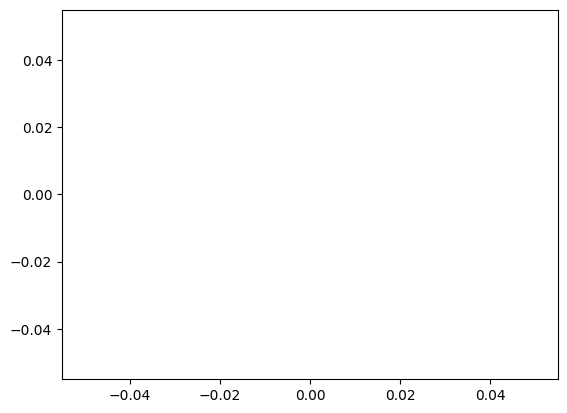

In [389]:
plt.plot(1-rs,Y[-1,:],marker='.')
i = 4
j = 8
slope = -(Y[-1,j] - Y[-1,4])/(rs[j]-rs[4])
print(slope, 2/n)
# plt.plot(1-rs**0.5,1-(slope*rs**0.5+.83))
# plt.plot(rs, 1.5-np.exp())
plt.scatter([0],[0],color='r',marker='x')

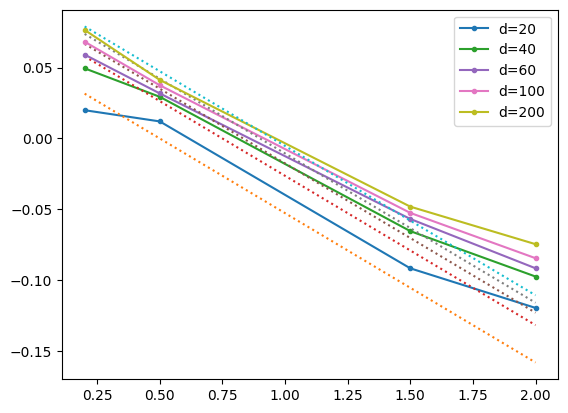

In [311]:

for d in [i*n for i in [1,2,3,5,10]]:
    plt.plot(alphas,Y[d,:],marker='.',label=f"d={d}")
    plt.plot(alphas,2/(n-1)*((1-alphas) - n/2/d),':')
plt.legend()

In [167]:
n = 10
d = 200
d0 = 10000


S = np.ones(n)
S[0] *= np.sqrt(1-n/d/2)
S /= np.mean(S**2)**0.5
X = np.random.randn(d0, n)
U, _, V = np.linalg.svd(X, full_matrices=False)
X = U @ np.diag(S) @ V
X /= np.mean(X**2)**0.5
CX = X.T @ X/d0


Cs = []
for _ in range(1000):
    X = np.random.randn(d, n)
    U, _, V = np.linalg.svd(X, full_matrices=False)
    X = U @ np.diag(S) @ V
    X /= np.mean(X**2)**0.5
    CX = X.T @ X/d

    W = np.random.randn(d,d)/np.sqrt(d)

    X = W @ X

    rn = np.mean(X**2,axis=1)**0.5

    Y = 1.0/rn[:,np.newaxis] * X

    CY = Y.T @ Y/d
    Cs.append(CY)

mineig = lambda CX: np.log(np.min(np.linalg.eigvalsh(CX)))

a, b, c = mineig(CX),mineig(CY), np.mean([mineig(C) for C in Cs])

(c-a)

-0.15622487596048726

In [3]:


@njit
def compute_mean_axis1(arr):
    result = np.empty(arr.shape[0])
    for i in range(arr.shape[0]):
        result[i] = np.mean(arr[i, :])
    return result

@njit
def batch_norm(X):
    mean_square = compute_mean_axis1(X ** 2)
    BN = mean_square ** (-0.5)
    return BN[:, np.newaxis] * X

@njit(parallel=True)
def compute_C_exp(ns, ds, L, N, r=1):
    C_exp = {}
    for ni in prange(len(ns)):
        n = ns[ni]
        for di in prange(len(ds)):
            d = int((n)**ds[di])
            Cs = np.empty((N, L, n,n))
            for k in prange(N):
                X = np.random.randn(d, r) @ np.random.randn(r, n)
                X += 0.01 * np.random.randn(d, n)
                X = np.random.randn(d, n)
                X /= np.sqrt(np.mean(X**2))
                C = np.empty((L, n, n))
                for l in range(L):
                    W = np.random.randn(d, d) / np.sqrt(d)
                    X = W @ X
                    X = batch_norm(X)
                    CX = X.T @ X / d
                    C[l,:,:] = CX
                Cs[k] = C

            C_exp[(n, d)] = Cs
    return C_exp

ns = [10, 20, 30, 40, 50,60]
ds = [1.6,]
L = 2000
N = 1
r = 1

ns = [2**i for i in range(5,10,2)]
ds = [1.0,]

# C_exp = compute_C_exp(ns, ds, L=L, N=N, r=r)

In [ ]:

for (n,d),Cs in C_exp.items():
    Cs = np.stack([np.linalg.eigvalsh(C) for C in Cs[:,-1,:,:]])
    print(n,d, np.mean(np.log(Cs[:,:])),)#np.mean(np.log(Cs[-1]),axis=0))

10 400 -0.04211777149921221
30 400 -0.4168701995883675
70 400 nan
40 400 -1.3727368760505432
90 400 nan
50 400 -3.8374550435014325
60 400 nan
80 400 nan
20 400 -0.16132063106224642


/var/folders/lm/3y29pbg17l30756m1x_vpb040000gp/T/ipykernel_72011/1882358725.py:3: RuntimeWarning: invalid value encountered in log
  print(n,d, np.mean(np.log(Cs[:,:])),)#np.mean(np.log(Cs[-1]),axis=0))


In [26]:
from scipy.stats import ortho_group


# @njit(parallel=True)
def compute_C_exp(ns, ds, L, N, r=0):
    C_exp = {}
    for ni in prange(len(ns)):
        n = ns[ni]
        if r==0:
            r = n-1
        for di in prange(len(ds)):
            d = ds[di]
            Cs = np.empty((N, L, n,n))
            for k in prange(N):
                X = np.random.randn(d, r) @ np.random.randn(r, n)
                X += 0.1 * np.random.randn(d, n)
                X /= np.sqrt(np.mean(X**2))
                C = np.empty((L, n, n))
                for l in range(L):
                    # W = ortho_group.rvs(d)
                    W = np.random.randn(d, d) / np.sqrt(d)
                    X = W @ X
                    X = batch_norm(X)
                    CX = X.T @ X / d
                    C[l,:,:] = CX
                Cs[k] = C

            C_exp[(n, d)] = Cs
    return C_exp

def comp_e(C_exp):
    E = dict()
    for (n,d),Cs in C_exp.items():
        e = np.empty((Cs.shape[0],Cs.shape[1],Cs.shape[2]))
        for i in range(e.shape[0]):
            for j in range(e.shape[1]):
                e[i,j,:] = np.linalg.eigvalsh(Cs[i,j,:,:])
        E[(n,d)] = e
    return E

L = 400
N = 3
n = 10
r = 0
d = 200

ns = [i*n for i in range(1,10)]
ds = [100,]

C_exp = compute_C_exp(ns, ds, L=L, N=N, r=r)
E = comp_e(C_exp)




This is an interesting question about approximating weighted sums of squared Gaussian random variables. Let's approach this step-by-step:

1) First, let's recall that if $Z \sim N(0,1)$, then $Z^2 \sim \chi^2(1)$ (chi-squared with 1 degree of freedom).

2) In your general case, we have $\sum_i a_i w_i^2$, where $w_i \sim N(0,1)$ and $a_i > 0$.

3) Each term $a_i w_i^2$ is essentially a scaled chi-squared variable with 1 degree of freedom.

4) The sum of independent chi-squared variables is also chi-squared, with degrees of freedom equal to the sum of the individual degrees of freedom. However, in this case, we have different scalings ($a_i$), which complicates things.

5) There's a theorem that can help us here, known as the Welch–Satterthwaite approximation. It states that a linear combination of independent chi-squared variables can be approximated by a scaled chi-squared distribution.

6) According to this approximation, $\sum_i a_i w_i^2$ can be approximated by $c \chi^2(k)$, where:

   $c = \frac{\sum_i a_i^2}{\sum_i a_i}$

   $k = \frac{(\sum_i a_i)^2}{\sum_i a_i^2}$

7) Here, $c$ is the scaling factor and $k$ is the approximate degrees of freedom.

8) This approximation works better when the $a_i$ are not too different from each other. If some $a_i$ are much larger than others, the approximation may be less accurate.

9) You can verify that this approximation reduces to the special cases you mentioned:
   - If all $a_i = 1$, then $c = 1$ and $k = n$, giving $\chi^2(n)$.
   - If $k$ of the $a_i$ equal $\alpha$ and the rest are zero, then $c = \alpha$ and $k = k$, giving $\alpha \chi^2(k)$.

10) The quality of this approximation improves as $n$ increases, due to the central limit theorem.

This approximation can be useful in many statistical applications, including in the analysis of neural networks where weighted sums of squared Gaussian variables might appear.

Would you like me to elaborate on any part of this explanation or discuss how this might apply in specific contexts?

d=100,	n=10,	slope=0.2476,	approx=0.1000
d=100,	n=20,	slope=0.1621,	approx=0.0500
d=100,	n=30,	slope=0.1131,	approx=0.0333
d=100,	n=40,	slope=0.0783,	approx=0.0250
d=100,	n=50,	slope=0.0531,	approx=0.0200
d=100,	n=60,	slope=0.0393,	approx=0.0167
d=100,	n=70,	slope=0.0318,	approx=0.0143
d=100,	n=80,	slope=0.0251,	approx=0.0125
d=100,	n=90,	slope=0.0222,	approx=0.0111


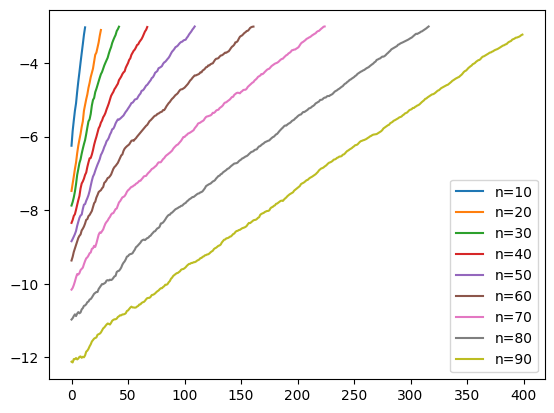

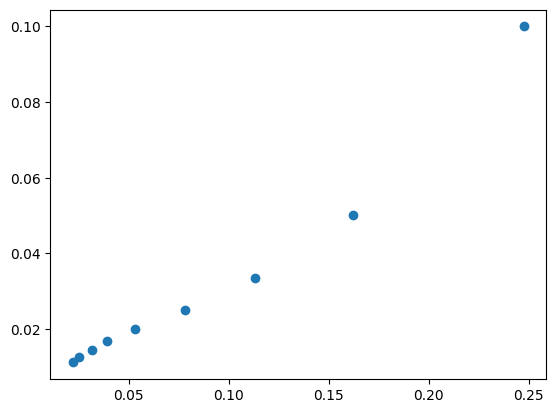

In [54]:
V = sorted([(d,n,e) for (n,d),e in E.items()])
data = []
for i,(d,n,e) in enumerate(V):
#     if i>0 and d!=V[i-1][0]:
#         plt.figure()
    le = np.mean(np.log(e), axis=0)
    a = le[:,0]
    a = a[~np.isnan(a)]
    a = a[a<-3]
    if len(a)<2:
        continue
    slope = -(a[0]-a[-1])/len(a)
    approx = 1/n#-n/d/1.0
    data.append((slope,approx))
    print(f"d={d},\tn={n},\tslope={slope:.4f},\tapprox={approx:.4f}")
    plt.plot(a,label=f"n={n}")
plt.legend()
slope,approx = zip(*data)
slope,approx = np.array(slope),np.array(approx)
plt.figure()
plt.scatter(slope,approx)      
# plt.xlim(-0.3,.3)
# plt.ylim(-0.3,.3)

In [3]:
n = 5
data = []
for n in [2, 5, 10, 15, 20,40]:
    for alpha in [2**(i) for i in range(-10,20)]:
        d = 100000

        r = alpha / (alpha + n-1) * n
        X = np.random.randn(d, n)
        X1 = alpha * X[:,0]**2
        X2 = np.sum(X[:,1:]**2,axis=1)
        R = X1/(X1+X2) * n 
        data.append((alpha, r, np.mean(R), n))
alphas,rs,Rs,ns = zip(*data)
alphas,rs,Rs,ns = np.array(alphas),np.array(rs), np.array(Rs),np.array(ns)

$$\log\lambda' \ge \log\lambda + c / (n-1) (1-\lambda)$$ 

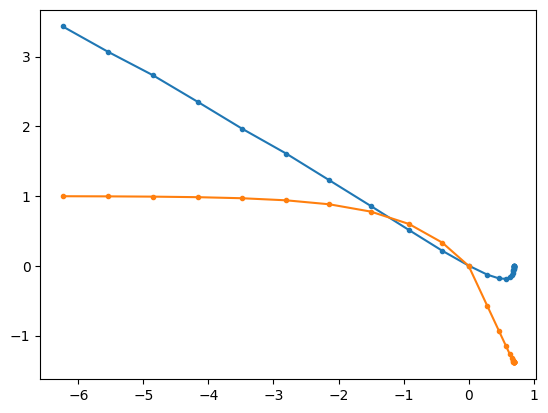

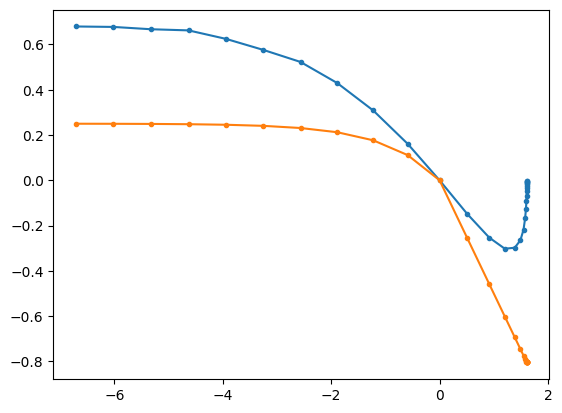

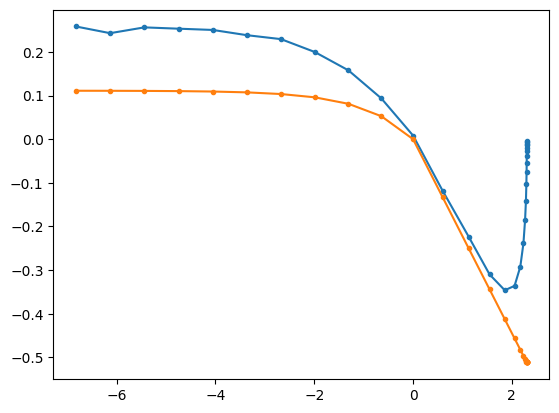

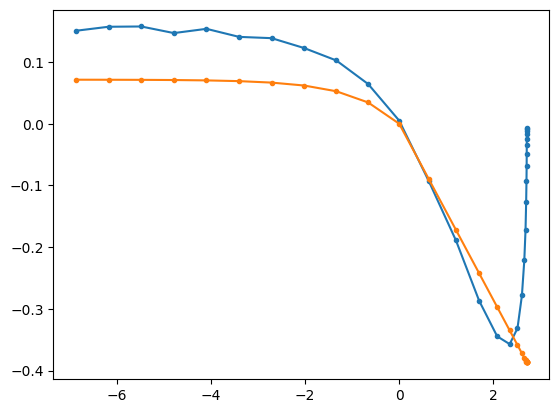

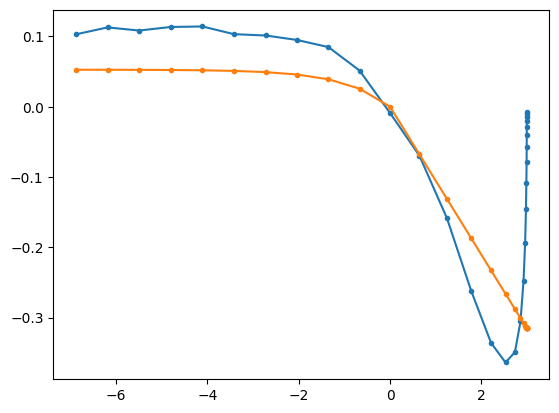

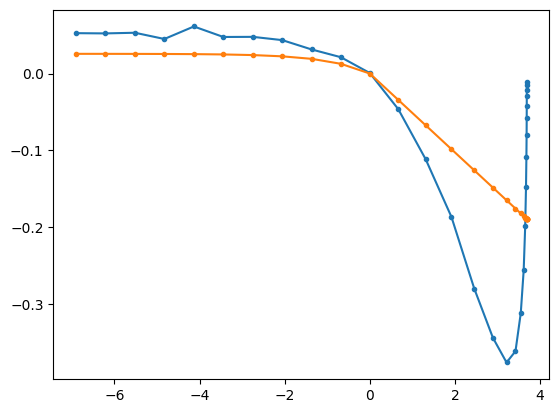

<Figure size 640x480 with 0 Axes>

In [4]:
for n in np.unique(ns):
    c = 1
    lr = np.log(rs[ns==n])
    lR = np.log(Rs[ns==n])
    guess = c/(n-1)*(1-np.exp(lr))
    guess2 = -lr * c / (n-1) * 2
    guess[lr>0] = guess2[lr>0]
    plt.plot(lr,lR-lr,marker='.',label=f"n={n}")
    plt.plot(lr,guess,marker='.',label=f"n={n}")
    # plt.axvline(np.log(n),)
    plt.figure()
    # plt.plot(lr,lr,':',)
    # plt.scatter([0],[0],color='black')

\begin{align}
\kappa_m (1-\alpha)^m + a_m = \kappa_m\\
\implies \kappa_m = a_m / (1-(1-\alpha)^m) \approx a_m / (m/n) = n a_m/m\\
a_0 = -n/2d, a_1 \approx \sqrt{n/d}\\
\kappa_1 \approx -n^2/d, \kappa_2 \approx n^{3/2}/d^{1/2}
\end{align}
$$
k_1 - n/2d = k_1 (1-1/n) \implies k_1 / n = n/2d \implies k_1 = n^2/d 
$$